In [1]:
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)


def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    return w

def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        plt.show()
        
        
        if check_True(pattern):
            print (count,"iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
            
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum in iteration:",count)
            break
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(patterns.shape[0]):
        if np.array_equal(patterns[i],predicted_pattern):
            print("It matches pattern number:",i)
            solved = True
    return solved

In [2]:
patterns = data[0:3,:]
w = init_weights(patterns)

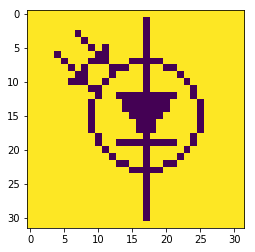

It matches pattern number: 2
1 iterations


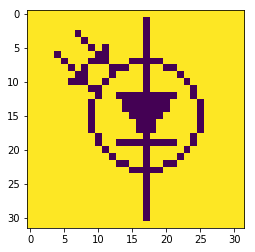

In [3]:
recall(data[2],w)

In [8]:
def distort_data(pattern,percentage):
    dim = pattern.size
    dist = int(dim*percentage)
    
    subDist = pattern[:dist]
    #print(pattern)
    distPattern=np.copy(pattern)
    np.random.shuffle(distPattern[:dist])
    
    plt.imshow(distPattern.reshape(32,32),interpolation="nearest")
    plt.show()
    
    return distPattern

def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    plt.show()
    
    return flipped



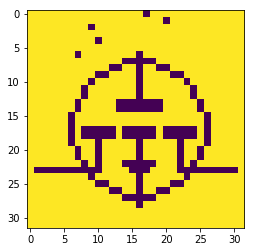

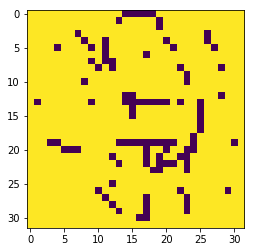

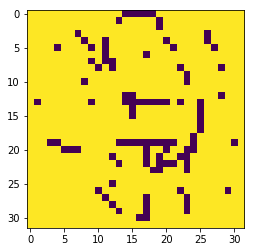

Local minimum in iteration: 2


In [28]:
d = distort_data(data[3],0.2)
recall(d,w)

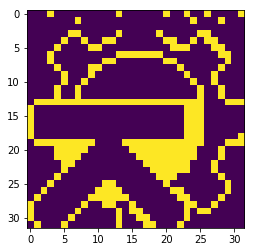

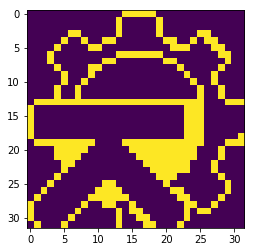

It matches pattern number: 1
1 iterations


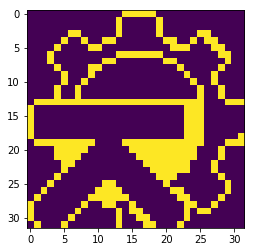

In [10]:
d = distort_data(data[1],0.1)
recall(d,w)